# Import all packages

In [26]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from missingpy import KNNImputer

# Import csv file and overview of data

In [15]:
dataset = pd.read_csv('../datasets/Aqua01/Aqua01.csv')
dataset.head()

,Time,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
0,"Fri, July 26, 2019, 6:33:23 PM",-,0,-,-,13.82,3.55,16
1,"Fri, July 26, 2019, 6:46:21 PM",3.83,-,-,0.0002,13.49,3.45,19
2,"Mon, July 29, 2019, 12:30:20 PM",3.06,-,-,0,13.54,3.54,22
3,"Mon, July 29, 2019, 1:10:14 PM",4.71,-,-,0.0017,13.58,3.14,24
4,"Mon, July 29, 2019, 2:00:09 PM",5.19,-,-,0.0052,13.22,2.77,23


In [16]:
dataset = dataset.replace('-', np.nan)
dataset.head()

,Time,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
0,"Fri, July 26, 2019, 6:33:23 PM",NaN,0,NaN,NaN,13.82,3.55,16
1,"Fri, July 26, 2019, 6:46:21 PM",3.83,NaN,NaN,0.0002,13.49,3.45,19
2,"Mon, July 29, 2019, 12:30:20 PM",3.06,NaN,NaN,0,13.54,3.54,22
3,"Mon, July 29, 2019, 1:10:14 PM",4.71,NaN,NaN,0.0017,13.58,3.14,24
4,"Mon, July 29, 2019, 2:00:09 PM",5.19,NaN,NaN,0.0052,13.22,2.77,23


In [17]:
dataset.dtypes

Time                      object
pH (moles/L)              object
DO (mg/L)                 object
Water Temperature (℃)     object
Ammonia (mg/L)            object
Battery (Volts)          float64
Solar (Volts)            float64
Signal Strength (dB)       int64
dtype: object

In [18]:
#convert datatype of all the columns to it's specific type
dataset['Time'] = pd.to_datetime(dataset['Time'])
dataset[dataset.columns[1:5]] = dataset[dataset.columns[1:5]].apply(pd.to_numeric)
dataset.dtypes

Time                     datetime64[ns]
pH (moles/L)                    float64
DO (mg/L)                       float64
Water Temperature (℃)           float64
Ammonia (mg/L)                  float64
Battery (Volts)                 float64
Solar (Volts)                   float64
Signal Strength (dB)              int64
dtype: object

In [19]:
dataset.head(10)

,Time,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
0,2019-07-26 18:33:23,NaN,0.0,NaN,NaN,13.82,3.55,16
1,2019-07-26 18:46:21,3.83,NaN,NaN,0.0002,13.49,3.45,19
2,2019-07-29 12:30:20,3.06,NaN,NaN,0.0000,13.54,3.54,22
3,2019-07-29 13:10:14,4.71,NaN,NaN,0.0017,13.58,3.14,24
4,2019-07-29 14:00:09,5.19,NaN,NaN,0.0052,13.22,2.77,23
5,2019-07-30 08:08:28,7.37,NaN,18.82,0.0084,12.96,20.81,31
6,2019-07-30 09:00:07,7.54,NaN,20.40,0.0139,13.05,19.12,31
7,2019-07-30 10:00:07,7.24,NaN,21.82,0.0078,13.67,31.40,31
8,2019-07-30 11:00:07,6.87,NaN,22.61,0.0035,14.30,8.77,31
9,2019-07-30 12:08:26,7.08,NaN,23.23,0.0060,14.39,6.59,31


In [20]:
dataset.index = dataset['Time']
del dataset['Time']

In [21]:
dataset = dataset.resample('h').mean()
dataset.head(20)

,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
Time,,,,,,,
2019-07-26 18:00:00,3.83,0.0,NaN,0.0002,13.655,3.5,17.5
2019-07-26 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-26 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-26 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-26 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-26 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-27 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-27 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
dataset.isnull().sum()

pH (moles/L)             1919
DO (mg/L)                2018
Water Temperature (℃)    2030
Ammonia (mg/L)           1919
Battery (Volts)          1919
Solar (Volts)            1919
Signal Strength (dB)     1919
dtype: int64

Text(0.5, 0, 'Time')

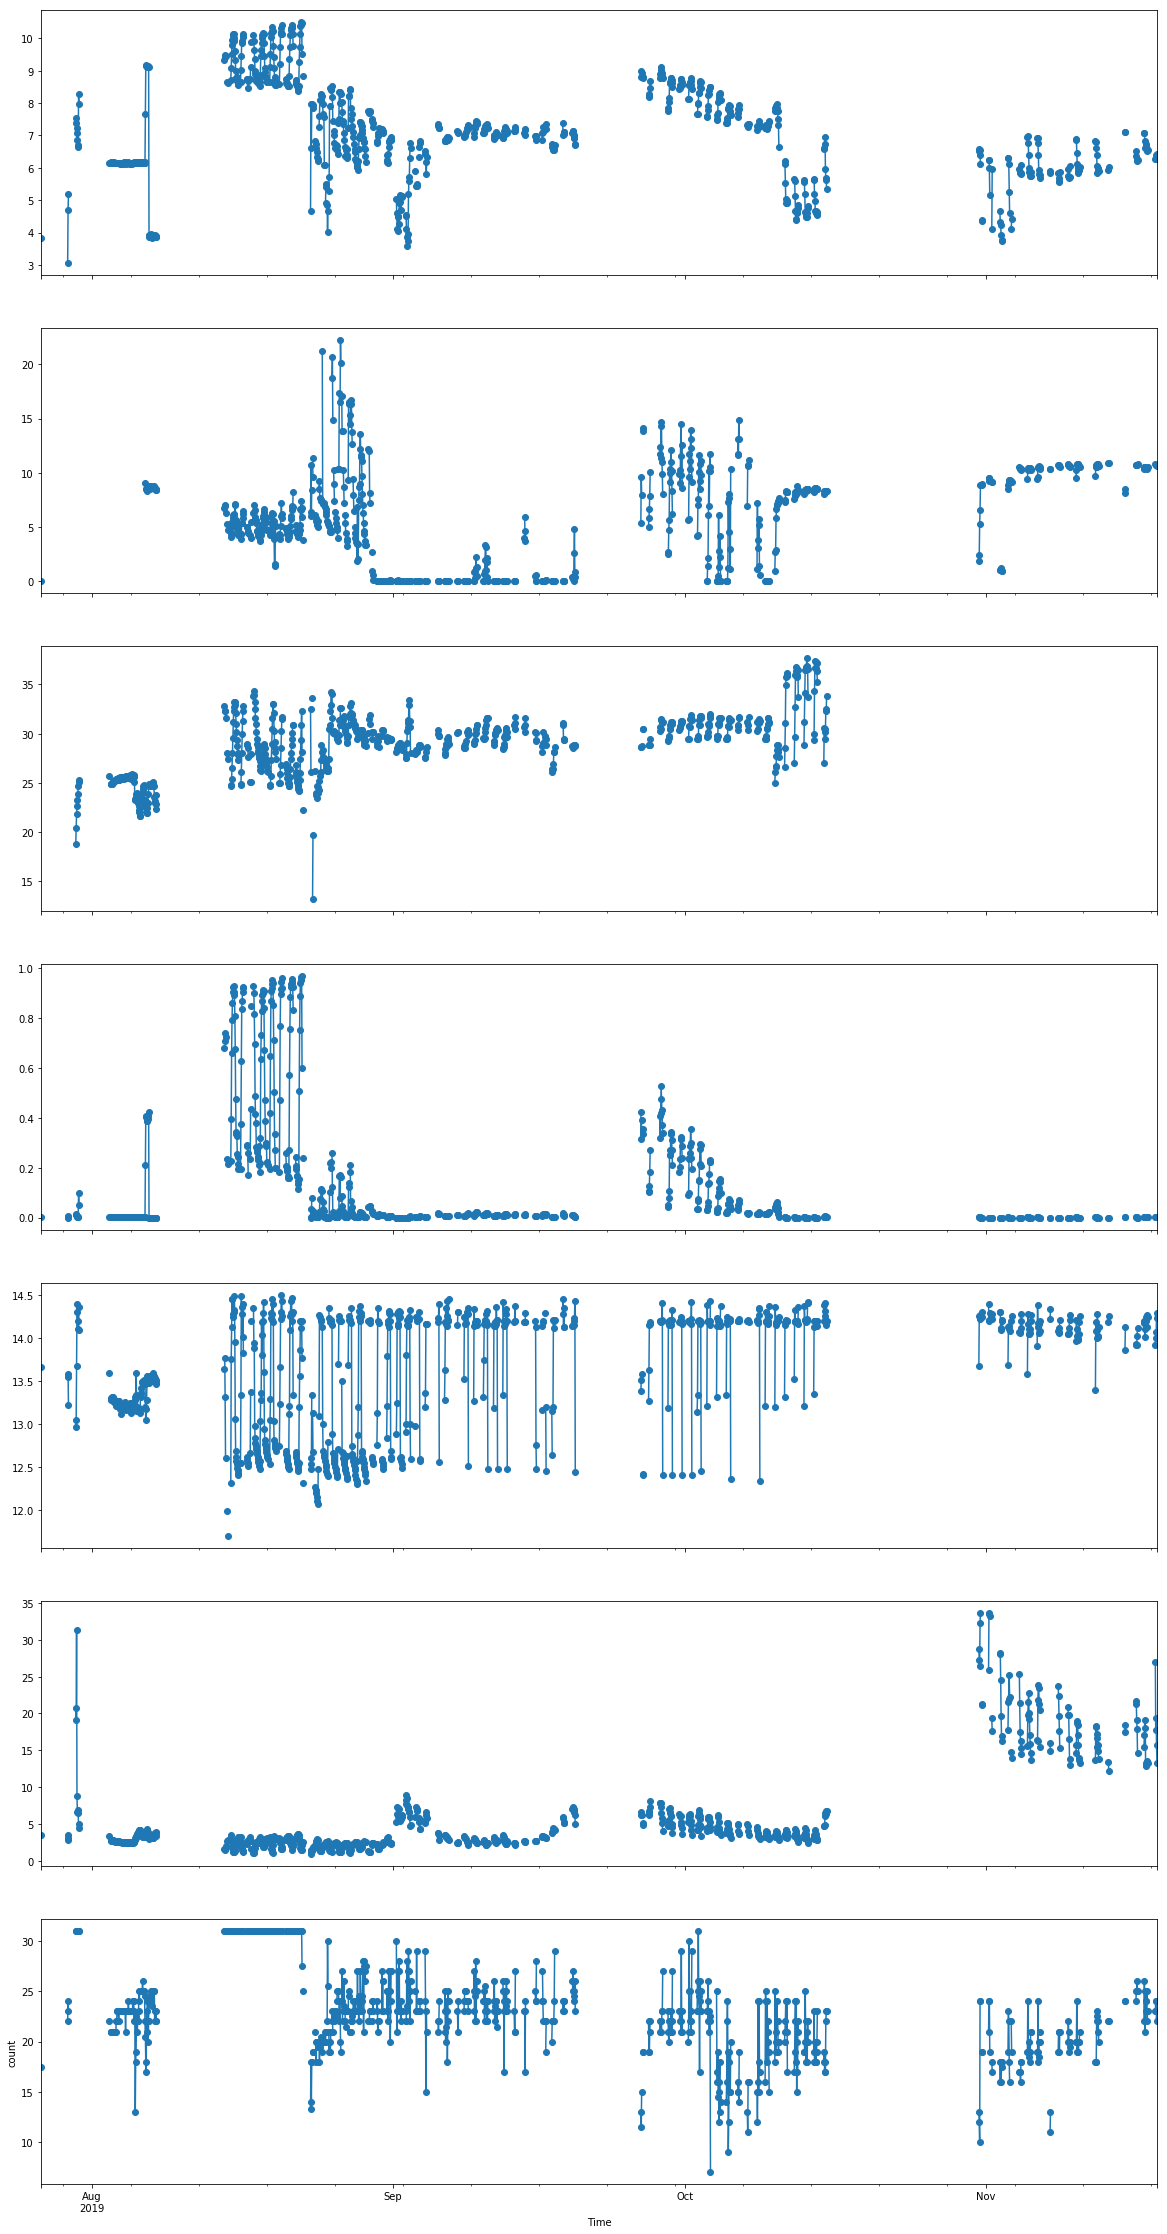

In [23]:
fig, axes = plt.subplots(nrows = 7, ncols = 1, sharex = True, figsize = (20,40))
ax1 = dataset[dataset.columns[0]].plot(ax = axes[0], marker ='o')
plt.ylabel('count')
ax2 = dataset[dataset.columns[1]].plot(ax = axes[1], marker ='o')
plt.ylabel('count')
ax3 = dataset[dataset.columns[2]].plot(ax = axes[2], marker ='o')
ax4 = dataset[dataset.columns[3]].plot(ax = axes[3], marker ='o')
ax5 = dataset[dataset.columns[4]].plot(ax = axes[4], marker ='o')
ax6 = dataset[dataset.columns[5]].plot(ax = axes[5], marker ='o')
ax7 = dataset[dataset.columns[6]].plot(ax = axes[6], marker ='o')
plt.xlabel('Time')

In [24]:
dataset[dataset.columns] = dataset[dataset.columns].interpolate(method = 'linear')
dataset.head()

,pH (moles/L),DO (mg/L),Water Temperature (℃),Ammonia (mg/L),Battery (Volts),Solar (Volts),Signal Strength (dB)
Time,,,,,,,
2019-07-26 18:00:00,3.830000,0.000,NaN,0.000200,13.655000,3.500000,17.500000
2019-07-26 19:00:00,3.818333,0.035,NaN,0.000197,13.653258,3.500606,17.568182
2019-07-26 20:00:00,3.806667,0.070,NaN,0.000194,13.651515,3.501212,17.636364
2019-07-26 21:00:00,3.795000,0.105,NaN,0.000191,13.649773,3.501818,17.704545
2019-07-26 22:00:00,3.783333,0.140,NaN,0.000188,13.648030,3.502424,17.772727


In [25]:
dataset.isnull().sum()

pH (moles/L)              0
DO (mg/L)                 0
Water Temperature (℃)    86
Ammonia (mg/L)            0
Battery (Volts)           0
Solar (Volts)             0
Signal Strength (dB)      0
dtype: int64

In [27]:
imputer = KNNImputer()
dataset[dataset.columns] = imputer.fit_transform(dataset[dataset.columns])

/anaconda3/lib/python3.7/site-packages/missingpy/utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [28]:
dataset.isnull().sum()

pH (moles/L)             0
DO (mg/L)                0
Water Temperature (℃)    0
Ammonia (mg/L)           0
Battery (Volts)          0
Solar (Volts)            0
Signal Strength (dB)     0
dtype: int64

Text(0.5, 0, 'Time')

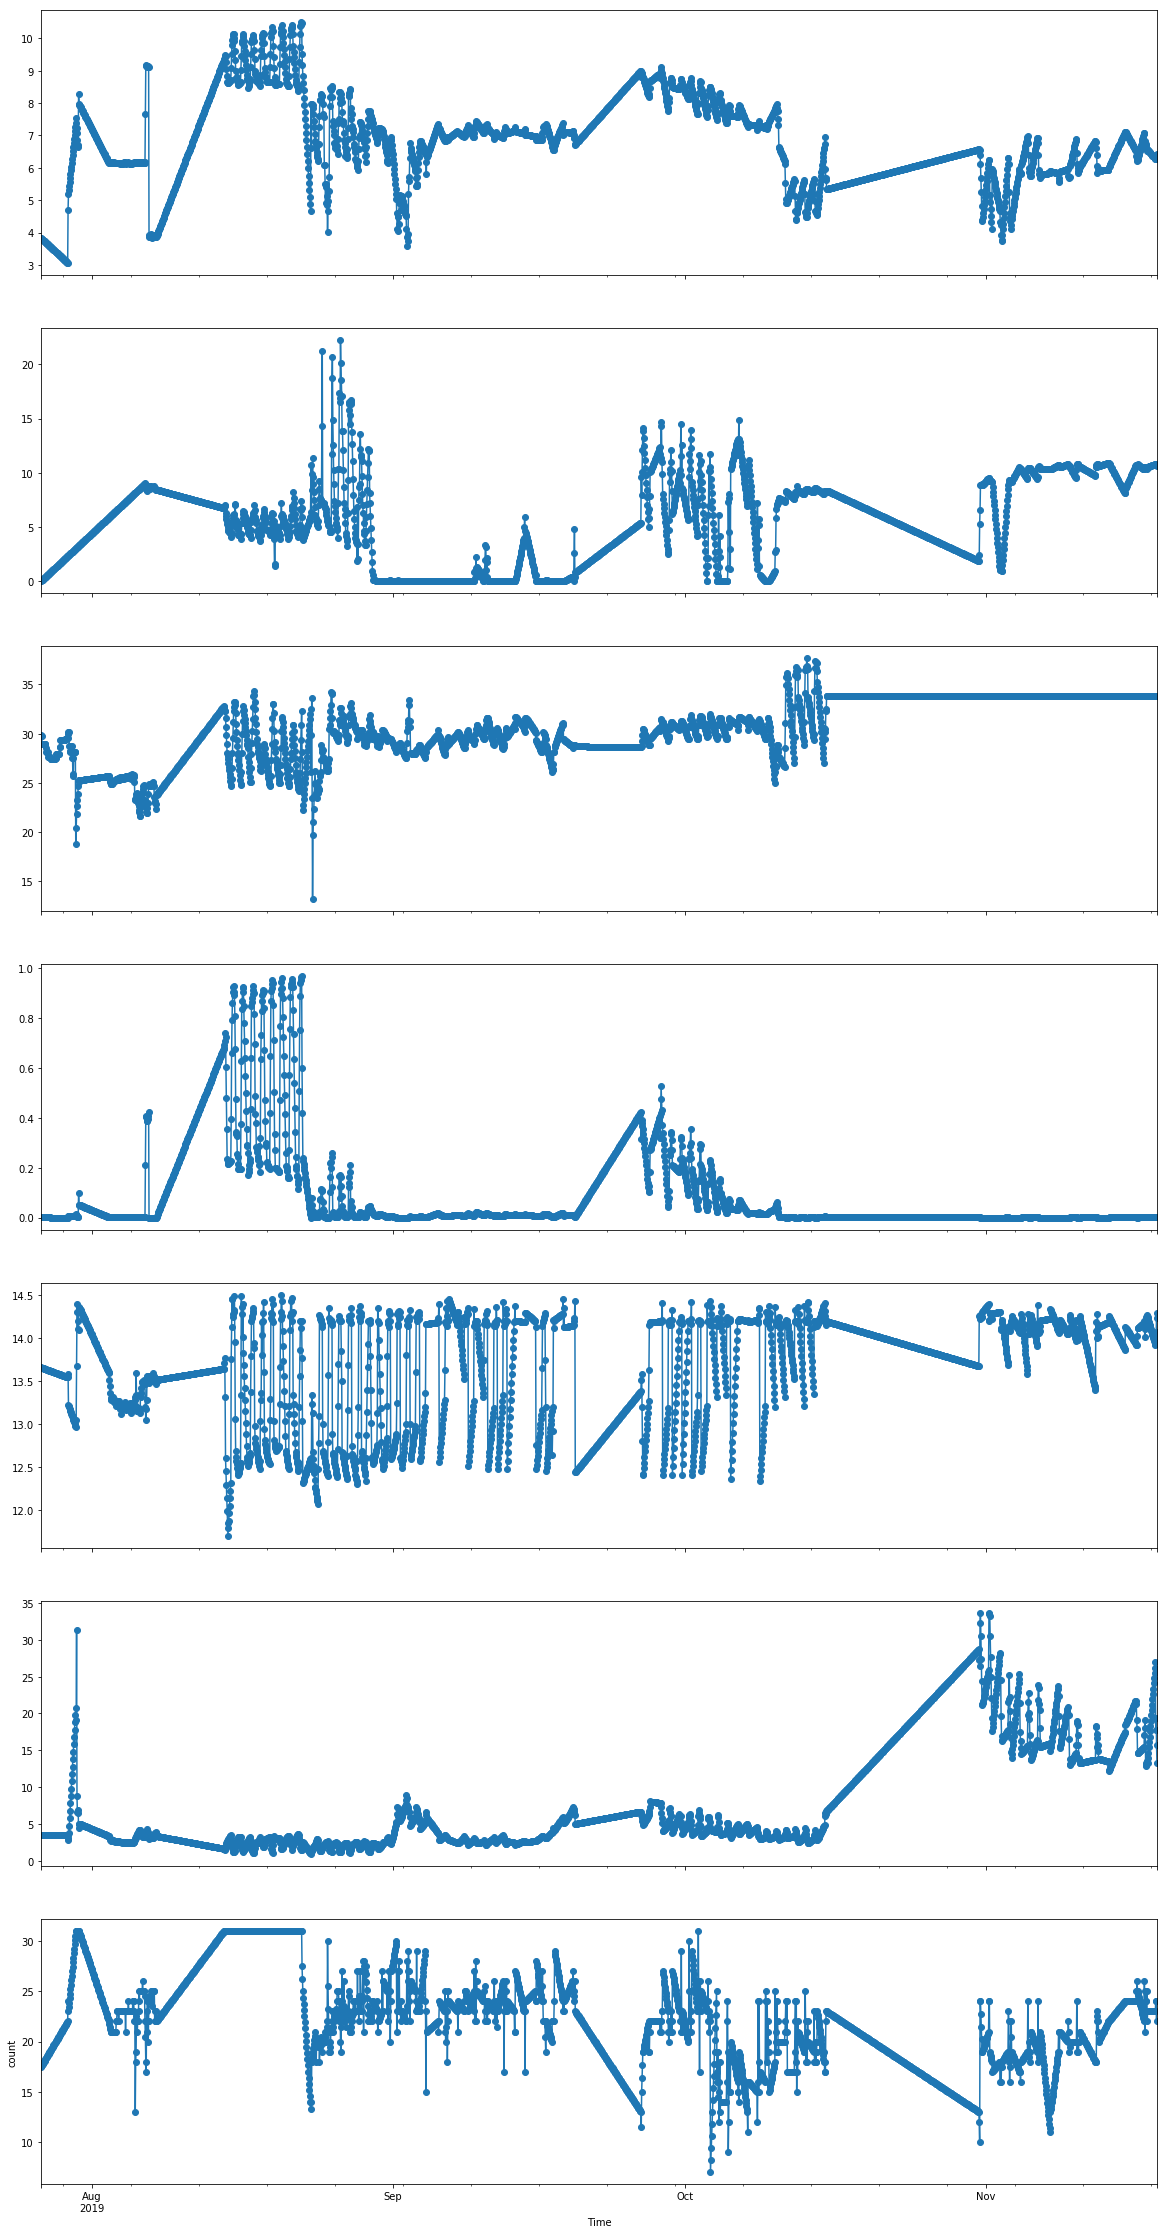

In [29]:
fig, axes = plt.subplots(nrows = 7, ncols = 1, sharex = True, figsize = (20,40))
ax1 = dataset[dataset.columns[0]].plot(ax = axes[0], marker ='o')
ax2 = dataset[dataset.columns[1]].plot(ax = axes[1], marker ='o')
ax3 = dataset[dataset.columns[2]].plot(ax = axes[2], marker ='o')
ax4 = dataset[dataset.columns[3]].plot(ax = axes[3], marker ='o')
ax5 = dataset[dataset.columns[4]].plot(ax = axes[4], marker ='o')
ax6 = dataset[dataset.columns[5]].plot(ax = axes[5], marker ='o')
ax7 = dataset[dataset.columns[6]].plot(ax = axes[6], marker ='o')
plt.ylabel('count')
plt.xlabel('Time')

In [39]:
training_set = dataset.iloc[:, 0:3]

In [40]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range = (0,1), copy = True)  #these parameter is default :) 
train = mms.fit_transform(training_set)

In [48]:
train.shape

(2758, 3)

In [50]:
type(train)

numpy.ndarray

In [54]:
timestep = 60
X_train = [[],[],[]]
y_train = [[],[],[]]
for j in range(0,train.shape[1]):
    for i in range(timestep, len(train)):
        X_train[j].append(train[i-timestep: i, j])
        y_train[j].append(train[i, j])


X_train, y_train = np.array(X_train), np.array(y_train)

In [56]:
X_train.shape[0]

3

In [57]:
X_train.shape[1]

2698

In [58]:
X_train.shape[2]

60

In [55]:
X_train.shape

(3, 2698, 60)

In [59]:
#reshaping it is useful when we have more than 1 number of indicator that influence the prediction

X_train = np.reshape(X_train, (X_train.shape[1], X_train.shape[2], X_train.shape[0]))

In [64]:
X_train.shape

(2698, 60, 3)

In [76]:
y_train = np.reshape(y_train, (y_train.shape[1], y_train.shape[0]))

In [77]:
y_train.shape

(2698, 3)

In [78]:
#import packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [79]:
regressor = Sequential()
#1st LSTM Layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 3)))
regressor.add(Dropout(0.2))
#2nd LSTM Layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#3rd LSTM Layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#4th LSTM Layer
regressor.add(LSTM(units = 50, return_sequences = False)) #default is false
regressor.add(Dropout(0.2))

#outputlayer
regressor.add(Dense(units = 3))

In [80]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [81]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
2698/2698 [==============================] - 15s 6ms/step - loss: 0.0365
Epoch 2/10
2698/2698 [==============================] - 14s 5ms/step - loss: 0.0138
Epoch 3/10
2698/2698 [==============================] - 15s 6ms/step - loss: 0.0134
Epoch 4/10
2698/2698 [==============================] - 15s 6ms/step - loss: 0.0122
Epoch 5/10
2698/2698 [==============================] - 15s 6ms/step - loss: 0.0121
Epoch 6/10
2698/2698 [==============================] - 15s 6ms/step - loss: 0.0110
Epoch 7/10
2698/2698 [==============================] - 15s 6ms/step - loss: 0.0103
Epoch 8/10
2698/2698 [==============================] - 17s 6ms/step - loss: 0.0099
Epoch 9/10
2698/2698 [==============================] - 16s 6ms/step - loss: 0.0086
Epoch 10/10
2698/2698 [==============================] - 16s 6ms/step - loss: 0.0080
